# Word Embedding

## Importing Libraries and Data

In [1]:
# imports needed library

import gensim 
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
data_file_tn='conversations.txt'

In [ ]:
# visualize txt conversations data

with open(data_file_tn, encoding="utf8", errors='ignore') as f:
    for i,line in enumerate (f):
        print(line)

## Cleaning Data

In [4]:
# remove specific ponctuation from txt
import re

punctuation = r"""!"$%&'()+,-;<=>?[\]^`{|}~،؟"""  #only ".*#@:/ " signs are kept
RE_PUNCT = re.compile(r'([%s])+' % re.escape(punctuation), re.UNICODE)

def strip_punctuation(text):
    txt = utils.to_unicode(text)
    return RE_PUNCT.sub(" ", text)

print('Those sign of punctuation were removed: \n', '"!$%&()+,-;<=>?[\]^{|}~،؟' )

Those sign of punctuation were removed: 
 "!$%&()+,-;<=>?[\]^{|}~،؟


In [ ]:
# install emoji package
pip install emoji

In [5]:
# remove emoji from txt
import emoji

def strip_emoji(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text
  
print('Those emojis were removed: \n')  
#emoji.UNICODE_EMOJI

Those emojis were removed: 



In [6]:
def strip_multichar(text):
    clean_text = re.sub(r'(.)\1+', r'\1\1', text)   
    return clean_text

In [7]:
from gensim import utils
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import strip_short

# order in filters' function counts!
filters = [lambda x: x.lower(), lambda x: strip_punctuation(x),  lambda x: strip_emoji(x), lambda x : strip_multichar(x), lambda x: strip_short(x, minsize=4)]

## Tokenizing Data

In [8]:
def read_input(input_file, filters):
    """This method reads the input file which is in .txt format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with open(input_file, 'rb') as f:
        for i, line in enumerate(f): 
            if (i%10000==0):
                logging.info ("read {0} conversations".format (i))
            # do some pre-processing and return a list of words for each review text
            yield preprocess_string(line, filters)

# read the tokenized conversations into a list
# each review item becomes a serries of words
documents_tn = list (read_input(data_file_tn, filters))
logging.info ("Done reading Tunisian data file")
print("\n Done lowcasing, removing punctuation, emojis, multiplicated characters, and words that have a size less than 3")

2019-05-30 13:14:32,922 : INFO : reading file conversations.txt...this may take a while
2019-05-30 13:14:32,923 : INFO : read 0 conversations
2019-05-30 13:14:33,604 : INFO : read 10000 conversations
2019-05-30 13:14:34,240 : INFO : read 20000 conversations
2019-05-30 13:14:34,922 : INFO : read 30000 conversations
2019-05-30 13:14:35,584 : INFO : read 40000 conversations
2019-05-30 13:14:35,682 : INFO : Done reading Tunisian data file



 Done lowcasing, removing punctuation, emojis, multiplicated characters, and words that have a size less than 3


## Running Word2Vect Model

In [ ]:
from gensim.models.word2vec import Word2Vec

# create vocaubulary = a set of unique words
model_tn = Word2Vec(documents_tn, size=200, window=5, min_count=5, workers=10, sg=1, iter=10, compute_loss=True)
# train w2v model
model_tn.train(documents_tn,total_examples=len(documents_tn),epochs=10)

# seave the trained model into .model file
# by default, the model is saved in a binary format to save space!
model_tn.save('model_tn.model')
print('Saved model:', model_tn)

# Pre-Processing Data

## Importing Libraries and Data

In [10]:
import pickle
from collections import defaultdict
import logging
import gensim
import numpy as np
from random import shuffle
import codecs
logger = logging.getLogger('relevance_logger')

In [11]:
data_file_labeled_tn ='conversation_labeled.txt'

In [ ]:
# visualize txt conversations_labeled data

with open(data_file_labeled_tn, encoding="utf8", errors='ignore') as f:
    for i,line in enumerate (f):
        print(line)

## Creating Multi-Turn Response Data

In [13]:
def clean(x):
    x.lower()
    x = strip_punctuation(x)
    x = strip_emoji(x)
    x = strip_multichar(x)
    x = strip_short(x, minsize=4)
    return x

In [14]:
def build_multiturn_data_tn(trainfile, max_len=100, isshuffle=False):
    """
    Transforms data.txt into a dictionary data={"y" : lable, "c":context, "r": response}
    Creates vacabulary dictionary vocab={"word": occurance}
    """
    lables = []
    contexts = []
    responses = []
    vocab = defaultdict(float)
    total = 1
    
    with codecs.open(trainfile,'r', encoding='utf-8-sig') as f:
        for line in f:
            parts = line.strip().split("\t") # data template: label \t conversation utterances (splited by \t) \t response 
            if (len(parts)>=3) :
                lable = int(parts[0])  #int 0 or 1    
            
                utterance = ""
                words = set()
                for i in range(1,len(parts)-1,1):
                    utterance += " _t_ "
                    utterance += clean(str(parts[i]))
                
                    list_utterance = [utterance]
                    words.update(set( clean(str(parts[i])).split()))
                
                response = clean(str(parts[-1]))
                list_response = [response] 
            
                lables.append(lable)
                contexts.append(list_utterance)
                responses.append(list_response)
            
                total += 1
                if total % 1000 == 0:
                    print (total)

                words.update(set(response.split()))
            
                for word in words:
                    vocab[word] += 1                      
                       
        data = {"y" : lables, "c":contexts,"r": responses}
                
    return data, vocab, max_len

In [15]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
data_tn, vocab_tn, max_len = build_multiturn_data_tn(data_file_labeled_tn,isshuffle=False)
logger.info("multiturn Tunisian dataset built!")

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


2019-05-30 13:20:30,389 : INFO : multiturn Tunisian dataset built!


12000


In [16]:
y = np.array(data_tn['y'])
c = np.array(data_tn['c'])
r = np.array(data_tn['r'])

print(len(y) == len(c) == len(r))

True


# Building Training, Validation and Test Data

In [7]:
import random

def build_train_set(data):
    """
    Creates train with 1:1 positive-negative ratios
    """
    #responses
    negative_sample = [] #creat all negative samples from context messages 
    for i in range(len(data_tn['c'])):
        nsample = data_tn['c'][i][0].split("_t_")
        negative_sample.append(nsample)
        
    responses = [] #genertae random negative responses from negative samples  
    for i in range(len(data['r'])):
        responses.append(data['r'][i])
        randi = random.randint(1,len(negative_sample)-1) #generate a random i number
        randj = random.randint(1,len(negative_sample[randi])-1) #generate a random j number  
        responses.append([negative_sample[randi][randj]])
            
    #labeles
    labeles = []
    for i in range(len(data['y'])):
        labeles.append(data['y'][i])
        labeles.append(0)
    
    #contextes
    contextes = []
    for i in range(len(data['c'])):
        contextes.append(data['c'][i])
        contextes.append(data['c'][i])
    
    train_data = {"y":labeles, "c":contextes,"r":responses}
    
    return train_data

In [18]:
train= {"y":data_tn['y'][:8400], "c":data_tn['c'][:8400],"r":data_tn['r'][:8400]}

In [19]:
train_data_tn = build_train_set(train)

In [20]:
y = np.array(train_data_tn['y'])
c = np.array(train_data_tn['c'])
r = np.array(train_data_tn['r'])

print(len(y) == len(c) == len(r))

True


In [6]:
import random

def build_prediction_set(data):
    """
    Creates train with 1:9 positive-negative ratios
    """    
    
    #creat all negative samples from context messages 
    negative_sample = [] 
    for i in range(len(data_tn['c'])):
        nsample = data_tn['c'][i][0].split("_t_")
        negative_sample.append(nsample)       

    #responses            
    responses = [] #genertae random negative responses from negative samples  
    for i in range(len(data['r'])):
        responses.append(data['r'][i])
        for k in range(9):
            randi = random.randint(1,len(negative_sample)-1) #generate a random i number
            randj = random.randint(1,len(negative_sample[randi])-1) #generate a random j number  
            responses.append([negative_sample[randi][randj]])
    
    #labeles
    labeles = []
    for i in range(len(data['y'])):
        labeles.append(data['y'][i])
        for i in range(9):
            labeles.append(0)
      
    #context
    contextes = []
    for i in range(len(data['c'])):
        for k in range(10):
            contextes.append(data['c'][i])
    
    prediction_data = {"y":labeles, "c":contextes,"r":responses}
    
    return prediction_data

In [14]:
valid= {"y":data_tn['y'][8400:10200], "c":data_tn['c'][8400:10200],"r":data_tn['r'][8400:10200]}

In [15]:
len(valid['y'])

1800

In [23]:
valid_data_tn = build_prediction_set(valid)

In [24]:
y = np.array(valid_data_tn['y'])
c = np.array(valid_data_tn['c'])
r = np.array(valid_data_tn['r'])

print(len(y) == len(c) == len(r))

True


In [12]:
test= {"y":data_tn['y'][10200:], "c":data_tn['c'][10200:],"r":data_tn['r'][10200:]}

In [13]:
len(test['y'])

2059

In [26]:
test_data_tn = build_prediction_set(test)

In [27]:
y = np.array(test_data_tn['y'])
c = np.array(test_data_tn['c'])
r = np.array(test_data_tn['r'])

print(len(y) == len(c) == len(r))

True


# Creating Word to Vect Indexes

In [2]:
class WordVecs(object):
    def __init__(self, fname, vocab, binary, gensim):
        if gensim:
            word_vecs = self.load_gensim(fname,vocab)
        self.k =  len(list(word_vecs.values())[0])
        self.W, self.word_idx_map = self.get_W(word_vecs, k=self.k)

    def load_gensim(self, fname, vocab):
        model = Word2Vec.load(fname)
        weights = [[0.] * model.vector_size]
        word_vecs = {}
        total_inside_new_embed = 0
        miss= 0
        for pair in vocab:
            word = gensim.utils.to_unicode(pair)
            if word in model:
                total_inside_new_embed += 1
                word_vecs[pair] = np.array([w for w in model[word]])
                #weights.append([w for w in model[word]])
            else:
                miss = miss + 1
                word_vecs[pair] = np.array([0.] * model.vector_size)
                #weights.append([0.] * model.vector_size)
        print ('transfer', total_inside_new_embed, 'words from the embedding file, with a total of', len(vocab), 'candidate')
        print ('missing word2vec', miss)
        return word_vecs
      
      
    def get_W(self, word_vecs, k=200):
        """
        Get word matrix. W[i] is the vector for the ith word indexed by i
        """
        vocab_size = len(word_vecs)
        word_idx_map = dict()
        W = np.zeros(shape=(vocab_size+1, k))
        W[0] = np.zeros(k)
        i = 1
        for word in word_vecs:
            W[i] = word_vecs[word]
            word_idx_map[word] = i
            i += 1
        return W, word_idx_map

In [30]:
from gensim.models.word2vec import Word2Vec

word2vec_tn = WordVecs('model_tn.model', vocab_tn, True, True)
print('WordVec object created, it contains: word_vectors, word_idx_map')
pickle.dump([data_tn, word2vec_tn, max_len], open("data_tn.test",'wb'))
logger.info("data_tn.test file uploaded! it contains a dictionary of question-answer pairs, WordVec object and max_len ")

2019-05-30 13:21:14,935 : INFO : loading Word2Vec object from model_tn.model
2019-05-30 13:21:14,936 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-30 13:21:15,116 : INFO : loading trainables recursively from model_tn.model.trainables.* with mmap=None
2019-05-30 13:21:15,118 : INFO : loading vocabulary recursively from model_tn.model.vocabulary.* with mmap=None
2019-05-30 13:21:15,120 : INFO : loading wv recursively from model_tn.model.wv.* with mmap=None
2019-05-30 13:21:15,122 : INFO : setting ignored attribute vectors_norm to None
2019-05-30 13:21:15,124 : INFO : setting ignored attribute cum_table to None
2019-05-30 13:21:15,126 : INFO : loaded model_tn.model
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: DeprecationWarn

transfer 8158 words from the embedding file, with a total of 36506 candidate
missing word2vec 28348
WordVec object created, it contains: word_vectors, word_idx_map


In [31]:
pickle.dump(word2vec_tn.W, open("embedding_tn.pkl",'wb'))

## Creating Indexed Data

In [14]:
def get_idx_r(response, word_idx_map):
    """
    Transforms a response into a list of indexs. 
    """
    words = response.split() #list of words from response
    r_idx = []  
    for i, word in enumerate(words):
        if word in word_idx_map:
            r_idx.append(word_idx_map[word])
        else:
            r_idx.append(0)
    return r_idx


def get_idx_c(context, word_idx_map):
    """
    Transforms a response into a list of indexs. 
    """
    words = context.split() #list of words from context
    c_idx = []  
    for i, word in enumerate(words):
        if word in word_idx_map:
            c_idx.append(word_idx_map[word])
        elif word == "_t_":
            c_idx.append(1000000)
        else:
            c_idx.append(0)
    return c_idx


In [15]:
def make_indexed_data_tn(data_tn, word_idx_map, max_l=50, filter_h=3, val_test_splits=[2,3],max_turn=10):
    """
    Transforms data into lists of indices.
    """
    #response
    response_idx = []
    for i in range(len(data_tn['r'])):
        for responses in data_tn['r'][i]:
            response_idx.append(get_idx_r(responses, word_idx_map))
    
    #context
    context_idx = []
    for i in range(len(data_tn['c'])):
        for contexts in data_tn['c'][i]:
            context_idx.append(get_idx_c(contexts, word_idx_map))
    
    #lable
    lable = data_tn['y']
    
    #final indexed data
    data = {"y" : lable, "c":context_idx,"r": response_idx}
    
    print('Indexed data prepeared!')
    return data

In [34]:
max_word_per_utterence = 50
dataset = r"data_tn.test"
x = pickle.load(open(dataset,"rb"))
data_tn, word2vec_tn, max_len = x[0], x[1], x[2]
indexed_data_tn = make_indexed_data_tn(data_tn,word2vec_tn.word_idx_map,max_l=max_word_per_utterence)

Indexed data prepeared!


In [35]:
# Building indexed training data
indexed_train_tn = make_indexed_data_tn(train_data_tn,word2vec_tn.word_idx_map,max_l=max_word_per_utterence)

Indexed data prepeared!


In [36]:
# Building indexed validation data
indexed_valid_tn = make_indexed_data_tn(valid_data_tn,word2vec_tn.word_idx_map,max_l=max_word_per_utterence)

Indexed data prepeared!


In [37]:
# Buildinging indexed test data
indexed_test_tn = make_indexed_data_tn(test_data_tn,word2vec_tn.word_idx_map,max_l=max_word_per_utterence)

Indexed data prepeared!


In [38]:
#pickle hole final data
pickle.dump([indexed_train_tn, indexed_valid_tn, indexed_test_tn], open("data_tn.pkl",'wb'))

# DAM Model

## Model Architecture

In [29]:
## evaluation.py


import sys

def get_p_at_n_in_m(data, n, m, ind):
    pos_score = data[ind][0]
    curr = data[ind:ind+m]
    curr = sorted(curr, key = lambda x:x[0], reverse=True)

    if curr[n-1][0] <= pos_score:
        return 1
    return 0

def evaluate(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            tokens = line.split("\t")
        
            if len(tokens) != 2:
                continue
            
            data.append((float(tokens[0]), int(tokens[1])))

	#assert len(data) % 10 == 0

    p_at_1_in_2  = 0.0
    p_at_1_in_10 = 0.0
    p_at_2_in_10 = 0.0
    p_at_5_in_10 = 0.0
    
    length = len(data) // 10

    for i in range(0, length):
        ind = i * 10
        assert data[ind][1] == 1
        
        p_at_1_in_2  += get_p_at_n_in_m(data, 1, 2, ind)
        p_at_1_in_10 += get_p_at_n_in_m(data, 1, 10, ind)
        p_at_2_in_10 += get_p_at_n_in_m(data, 2, 10, ind)
        p_at_5_in_10 += get_p_at_n_in_m(data, 5, 10, ind)
        
    return (p_at_1_in_2/length, p_at_1_in_10/length, p_at_2_in_10/length, p_at_5_in_10/length)

In [30]:
## reader.py

import pickle
import numpy as np

def unison_shuffle(data, seed=None):
    if seed is not None:
        np.random.seed(seed)

    y = np.array(data['y'])
    c = np.array(data['c'])
    r = np.array(data['r'])

    assert len(y) == len(c) == len(r)
    p = np.random.permutation(len(y))
    shuffle_data = {'y': y[p], 'c': c[p], 'r': r[p]}
    return shuffle_data

def split_c(c, split_id):
    '''c is a list, example context
       split_id is a integer, conf[_EOS_]
       return nested list
    '''
    turns = [[]]
    for _id in c:
        if _id != split_id:
            turns[-1].append(_id)
        else:
            turns.append([])
    if turns[-1] == [] and len(turns) > 1:
        turns.pop()
    return turns

def normalize_length(_list, length, cut_type='tail'):
    '''_list is a list or nested list, example turns/r/single turn c
       cut_type is head or tail, if _list len > length is used
       return a list len=length and min(read_length, length)
    '''
    real_length = len(_list)
    if real_length == 0:
        return [0]*length, 0

    if real_length <= length:
        if not isinstance(_list[0], list):
            _list.extend([0]*(length - real_length))
        else:
            _list.extend([[]]*(length - real_length))
        return _list, real_length

    if cut_type == 'head':
        return _list[:length], length
    if cut_type == 'tail':
        return _list[-length:], length

def produce_one_sample(data, index, split_id, max_turn_num, max_turn_len, turn_cut_type='tail', term_cut_type='tail'):
    '''max_turn_num=10
       max_turn_len=50
       return y, nor_turns_nor_c, nor_r, turn_len, term_len, r_len
    '''
    c = data['c'][index]
    r = data['r'][index][:]
    y = data['y'][index]

    turns = split_c(c, split_id)
    #normalize turns_c length, nor_turns length is max_turn_num
    nor_turns, turn_len = normalize_length(turns, max_turn_num, turn_cut_type)

    nor_turns_nor_c = []
    term_len = []
    #nor_turn_nor_c length is max_turn_num, element is a list length is max_turn_len
    for c in nor_turns:
        #nor_c length is max_turn_len
        nor_c, nor_c_len = normalize_length(c, max_turn_len, term_cut_type)
        nor_turns_nor_c.append(nor_c)
        term_len.append(nor_c_len)

    nor_r, r_len = normalize_length(r, max_turn_len, term_cut_type)

    return y, nor_turns_nor_c, nor_r, turn_len, term_len, r_len

def build_one_batch(data, batch_index, conf, turn_cut_type='tail', term_cut_type='tail'):
    _turns = []
    _tt_turns_len = []
    _every_turn_len = []

    _response = []
    _response_len = []

    _label = []

    for i in range(conf['batch_size']):
        index = batch_index * conf['batch_size'] + i
        y, nor_turns_nor_c, nor_r, turn_len, term_len, r_len = produce_one_sample(data, index, conf['_EOS_'], conf['max_turn_num'],
                conf['max_turn_len'], turn_cut_type, term_cut_type)

        _label.append(y)
        _turns.append(nor_turns_nor_c)
        _response.append(nor_r)
        _every_turn_len.append(term_len)
        _tt_turns_len.append(turn_len)
        _response_len.append(r_len)

    return _turns, _tt_turns_len, _every_turn_len, _response, _response_len, _label

def build_one_batch_dict(data, batch_index, conf, turn_cut_type='tail', term_cut_type='tail'):
    _turns, _tt_turns_len, _every_turn_len, _response, _response_len, _label = build_one_batch(data, batch_index, conf, turn_cut_type, term_cut_type)
    ans = {'turns': _turns,
            'tt_turns_len': _tt_turns_len,
            'every_turn_len': _every_turn_len,
            'response': _response,
            'response_len': _response_len,
            'label': _label}
    return ans
    

def build_batches(data, conf, turn_cut_type='tail', term_cut_type='tail'):
    _turns_batches = []
    _tt_turns_len_batches = []
    _every_turn_len_batches = []

    _response_batches = []
    _response_len_batches = []

    _label_batches = []

    batch_len = len(data['y'])//conf['batch_size']
    for batch_index in range(batch_len):
        _turns, _tt_turns_len, _every_turn_len, _response, _response_len, _label = build_one_batch(data, batch_index, conf, turn_cut_type='tail', term_cut_type='tail')

        _turns_batches.append(_turns)
        _tt_turns_len_batches.append(_tt_turns_len)
        _every_turn_len_batches.append(_every_turn_len)

        _response_batches.append(_response)
        _response_len_batches.append(_response_len)

        _label_batches.append(_label)

    ans = { 
        "turns": _turns_batches, "tt_turns_len": _tt_turns_len_batches, "every_turn_len":_every_turn_len_batches,
        "response": _response_batches, "response_len": _response_len_batches, "label": _label_batches
    }   

    return ans 

In [31]:
##operations.py


import math
import numpy as np
from scipy.stats import multivariate_normal
import tensorflow as tf

def learning_rate(step_num, d_model=512, warmup_steps=4000):
    a = step_num**(-0.5)
    b = step_num*warmup_steps**(-1.5)
    return a, b, d_model**(-0.5) * min(step_num**(-0.5), step_num*(warmup_steps**(-1.5))) 

def selu(x):
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    print('use selu')
    return scale*tf.where(x>=0.0, x, alpha*tf.nn.elu(x))

def bilinear_sim_4d(x, y, is_nor=True):
    '''calulate bilinear similarity with two 4d tensor.
    
    Args:
        x: a tensor with shape [batch, time_x, dimension_x, num_stacks]
        y: a tensor with shape [batch, time_y, dimension_y, num_stacks]

    Returns:
        a tensor with shape [batch, time_x, time_y, num_stacks]

    Raises:
        ValueError: if
            the shapes of x and y are not match;
            bilinear matrix reuse error.
    '''
    M = tf.get_variable(
        name="bilinear_matrix", 
        shape=[x.shape[2], y.shape[2], x.shape[3]],
        dtype=tf.float32,
        initializer=tf.orthogonal_initializer())
    sim = tf.einsum('biks,kls,bjls->bijs', x, M, y)

    if is_nor:
        scale = tf.sqrt(tf.cast(x.shape[2] * y.shape[2], tf.float32))
        scale = tf.maximum(1.0, scale)
        return sim / scale
    else:
        return sim


def bilinear_sim(x, y, is_nor=True):
    '''calculate bilinear similarity with two tensor.
    Args:
        x: a tensor with shape [batch, time_x, dimension_x]
        y: a tensor with shape [batch, time_y, dimension_y]
    
    Returns:
        a tensor with shape [batch, time_x, time_y]
    Raises:
        ValueError: if
            the shapes of x and y are not match;
            bilinear matrix reuse error.
    '''
    M = tf.get_variable(
        name="bilinear_matrix", 
        shape=[x.shape[-1], y.shape[-1]],
        dtype=tf.float32,
        initializer=tf.orthogonal_initializer())
    sim = tf.einsum('bik,kl,bjl->bij', x, M, y)

    if is_nor:
        scale = tf.sqrt(tf.cast(x.shape[-1] * y.shape[-1], tf.float32))
        scale = tf.maximum(1.0, scale)
        return sim / scale
    else:
        return sim

def dot_sim(x, y, is_nor=True):
    '''calculate dot similarity with two tensor.

    Args:
        x: a tensor with shape [batch, time_x, dimension]
        y: a tensor with shape [batch, time_y, dimension]
    
    Returns:
        a tensor with shape [batch, time_x, time_y]
    Raises:
        AssertionError: if
            the shapes of x and y are not match.
    '''
    assert x.shape[-1] == y.shape[-1]

    sim = tf.einsum('bik,bjk->bij', x, y)

    if is_nor:
        scale = tf.sqrt(tf.cast(x.shape[-1], tf.float32))
        scale = tf.maximum(1.0, scale)
        return sim / scale
    else:
        return sim

def layer_norm(x, axis=None, epsilon=1e-6):
    '''Add layer normalization.

    Args:
        x: a tensor
        axis: the dimensions to normalize

    Returns:
        a tensor the same shape as x.

    Raises:
    '''
    print('wrong version of layer_norm')
    scale = tf.get_variable(
        name='scale',
        shape=[1],
        dtype=tf.float32,
        initializer=tf.ones_initializer())
    bias = tf.get_variable(
        name='bias',
        shape=[1],
        dtype=tf.float32,
        initializer=tf.zeros_initializer())

    if axis is None:
        axis = [-1]

    mean = tf.reduce_mean(x, axis=axis, keep_dims=True)
    variance = tf.reduce_mean(tf.square(x - mean), axis=axis, keep_dims=True)
    norm = (x-mean) * tf.rsqrt(variance + epsilon)
    return scale * norm + bias

def layer_norm_debug(x, axis = None, epsilon=1e-6):
    '''Add layer normalization.

    Args:
        x: a tensor
        axis: the dimensions to normalize

    Returns:
        a tensor the same shape as x.

    Raises:
    '''
    if axis is None:
        axis = [-1]
    shape = [x.shape[i] for i in axis]

    scale = tf.get_variable(
        name='scale',
        shape=shape,
        dtype=tf.float32,
        initializer=tf.ones_initializer())
    bias = tf.get_variable(
        name='bias',
        shape=shape,
        dtype=tf.float32,
        initializer=tf.zeros_initializer())

    mean = tf.reduce_mean(x, axis=axis, keep_dims=True)
    variance = tf.reduce_mean(tf.square(x - mean), axis=axis, keep_dims=True)
    norm = (x-mean) * tf.rsqrt(variance + epsilon)
    return scale * norm + bias

def dense(x, out_dimension=None, add_bias=True):
    '''Add dense connected layer, Wx + b.

    Args:
        x: a tensor with shape [batch, time, dimension]
        out_dimension: a number which is the output dimension

    Return:
        a tensor with shape [batch, time, out_dimension]

    Raises:
    '''
    if out_dimension is None:
        out_dimension = x.shape[-1]

    W = tf.get_variable(
        name='weights',
        shape=[x.shape[-1], out_dimension],
        dtype=tf.float32,
        initializer=tf.orthogonal_initializer())
    if add_bias:
        bias = tf.get_variable(
            name='bias',
            shape=[1],
            dtype=tf.float32,
            initializer=tf.zeros_initializer())
        return tf.einsum('bik,kj->bij', x, W) + bias
    else:
        return tf.einsum('bik,kj->bij', x, W)

def matmul_2d(x, out_dimension, drop_prob=None):
    '''Multiplies 2-d tensor by weights.

    Args:
        x: a tensor with shape [batch, dimension]
        out_dimension: a number

    Returns:
        a tensor with shape [batch, out_dimension]

    Raises:
    '''
    W = tf.get_variable(
        name='weights',
        shape=[x.shape[1], out_dimension],
        dtype=tf.float32,
        initializer=tf.orthogonal_initializer())
    if drop_prob is not None:
        W = tf.nn.dropout(W, drop_prob)
        print('W is dropout')

    return tf.matmul(x, W)

def gauss_positional_encoding_vector(x, role=0, value=0):
    position = int(x.shape[1])
    dimension = int(x.shape[2])
    print('position: %s' %position)
    print('dimension: %s' %dimension)

    _lambda = tf.get_variable(
        name='lambda',
        shape=[position],
        dtype=tf.float32,
        initializer=tf.constant_initializer(value))
    _lambda = tf.expand_dims(_lambda, axis=-1)

    mean = [position/2.0, dimension/2.0]

    #cov = [[position/3.0, 0], [0, dimension/3.0]]
    sigma_x = position/math.sqrt(4.0*dimension)
    sigma_y = math.sqrt(dimension/4.0)
    cov = [[sigma_x*sigma_x, role*sigma_x*sigma_y], 
            [role*sigma_x*sigma_y, sigma_y*sigma_y]]

    pos = np.dstack(np.mgrid[0:position, 0:dimension])

    
    rv = multivariate_normal(mean, cov)
    signal = rv.pdf(pos) 
    signal = signal - np.max(signal)/2.0

    signal = tf.multiply(_lambda, signal)
    signal = tf.expand_dims(signal, axis=0)

    print('gauss positional encoding')

    return x + _lambda * signal

def positional_encoding(x, min_timescale=1.0, max_timescale=1.0e4, value=0):
    '''Adds a bunch of sinusoids of different frequencies to a tensor.

    Args:
        x: a tensor with shape [batch, length, channels]
        min_timescale: a float
        max_timescale: a float

    Returns:
        a tensor the same shape as x.

    Raises:
    '''
    length = x.shape[1]
    channels = x.shape[2]
    _lambda = tf.get_variable(
        name='lambda',
        shape=[1],
        dtype=tf.float32,
        initializer=tf.constant_initializer(value))

    position = tf.to_float(tf.range(length))
    num_timescales = channels // 2
    log_timescale_increment = (
        math.log(float(max_timescale) / float(min_timescale)) /
        (tf.to_float(num_timescales) - 1))
    inv_timescales = min_timescale * tf.exp(
        tf.to_float(tf.range(num_timescales)) * -log_timescale_increment)
    scaled_time = tf.expand_dims(position, 1) * tf.expand_dims(inv_timescales, 0)
    signal = tf.concat([tf.sin(scaled_time), tf.cos(scaled_time)], axis=1)
    signal = tf.pad(signal, [[0, 0], [0, tf.mod(channels, 2)]])
    #signal = tf.reshape(signal, [1, length, channels])
    signal = tf.expand_dims(signal, axis=0)

    return x + _lambda * signal


def positional_encoding_vector(x, min_timescale=1.0, max_timescale=1.0e4, value=0):
    '''Adds a bunch of sinusoids of different frequencies to a tensor.

    Args:
        x: a tensor with shape [batch, length, channels]
        min_timescale: a float
        max_timescale: a float

    Returns:
        a tensor the same shape as x.

    Raises:
    '''
    length = x.shape[1]
    channels = x.shape[2]
    _lambda = tf.get_variable(
        name='lambda',
        shape=[length],
        dtype=tf.float32,
        initializer=tf.constant_initializer(value))
    _lambda = tf.expand_dims(_lambda, axis=-1)

    position = tf.to_float(tf.range(length))
    num_timescales = channels // 2
    log_timescale_increment = (
        math.log(float(max_timescale) / float(min_timescale)) /
        (tf.to_float(num_timescales) - 1))
    inv_timescales = min_timescale * tf.exp(
        tf.to_float(tf.range(num_timescales)) * -log_timescale_increment)
    scaled_time = tf.expand_dims(position, 1) * tf.expand_dims(inv_timescales, 0)
    signal = tf.concat([tf.sin(scaled_time), tf.cos(scaled_time)], axis=1)
    signal = tf.pad(signal, [[0, 0], [0, tf.mod(channels, 2)]])

    signal = tf.multiply(_lambda, signal)
    signal = tf.expand_dims(signal, axis=0)

    return x + signal

def opmask(row_lengths, col_lengths, max_row_length, max_col_length):
    '''Return a mask tensor representing the first N positions of each row and each column.

    Args:
        row_lengths: a tensor with shape [batch]
        col_lengths: a tensor with shape [batch]

    Returns:
        a mask tensor with shape [batch, max_row_length, max_col_length]

    Raises:
    '''
    row_mask = tf.sequence_mask(row_lengths, max_row_length) #bool, [batch, max_row_len]
    col_mask = tf.sequence_mask(col_lengths, max_col_length) #bool, [batch, max_col_len]

    row_mask = tf.cast(tf.expand_dims(row_mask, -1), tf.float32)
    col_mask = tf.cast(tf.expand_dims(col_mask, -1), tf.float32)

    return tf.einsum('bik,bjk->bij', row_mask, col_mask)

def weighted_sum(weight, values):
    '''Calcualte the weighted sum.

    Args:
        weight: a tensor with shape [batch, time, dimension]
        values: a tensor with shape [batch, dimension, values_dimension]

    Return:
        a tensor with shape [batch, time, values_dimension]

    Raises:
    '''
    return tf.einsum('bij,bjk->bik', weight, values)

In [32]:
##layers.py


import tensorflow as tf
#import utils.operations as op

def similarity(x, y, x_lengths, y_lengths):
    '''calculate similarity with two 3d tensor.

    Args:
        x: a tensor with shape [batch, time_x, dimension]
        y: a tensor with shape [batch, time_y, dimension]

    Returns:
        a tensor with shape [batch, time_x, time_y]

    Raises:
        ValueError: if
            the dimenisons of x and y are not equal.
    '''
    with tf.variable_scope('x_attend_y'):
        try:
            x_a_y = block(
                x, y, y,
                Q_lengths=x_lengths, K_lengths=y_lengths)
        except ValueError:
            tf.get_variable_scope().reuse_variables()
            x_a_y = block(
                x, y, y,
                Q_lengths=x_lengths, K_lengths=y_lengths)

    with tf.variable_scope('y_attend_x'):
        try:
            y_a_x = block(
                y, x, x,
                Q_lengths=y_lengths, K_lengths=x_lengths)
        except ValueError:
            tf.get_variable_scope().reuse_variables()
            y_a_x = block(
                y, x, x,
                Q_lengths=y_lengths, K_lengths=x_lengths)

    return tf.matmul(x + x_a_y, y + y_a_x, transpose_b=True)


def dynamic_L(x):
    '''Attention machanism to combine the infomation, 
       from https://arxiv.org/pdf/1612.01627.pdf.

    Args:
        x: a tensor with shape [batch, time, dimension]

    Returns:
        a tensor with shape [batch, dimension]

    Raises:
    '''
    key_0 = tf.get_variable(
        name='key',
        shape=[x.shape[-1]],
        dtype=tf.float32,
        initializer=tf.random_uniform_initializer(
            -tf.sqrt(6./tf.cast(x.shape[-1], tf.float32)),
            tf.sqrt(6./tf.cast(x.shape[-1], tf.float32))))

    key = dense(x, add_bias=False) #[batch, time, dimension]
    weight = tf.reduce_sum(tf.multiply(key, key_0), axis=-1)  #[batch, time]
    weight = tf.expand_dims(tf.nn.softmax(weight), -1)  #[batch, time, 1]

    L = tf.reduce_sum(tf.multiply(x, weight), axis=1) #[batch, dimension]
    return L 

def loss(x, y, num_classes=2, is_clip=True, clip_value=10):
    '''From info x calculate logits as return loss.

    Args:
        x: a tensor with shape [batch, dimension]
        num_classes: a number

    Returns:
        loss: a tensor with shape [1], which is the average loss of one batch
        logits: a tensor with shape [batch, 1]

    Raises:
        AssertionError: if
            num_classes is not a int greater equal than 2.
    TODO:
        num_classes > 2 may be not adapted.
    '''
    assert isinstance(num_classes, int)
    assert num_classes >= 2

    W = tf.get_variable(
        name='weights',
        shape=[x.shape[-1], num_classes-1],
        initializer=tf.orthogonal_initializer())
    bias = tf.get_variable(
        name='bias',
        shape=[num_classes-1],
        initializer=tf.zeros_initializer())

    logits = tf.reshape(tf.matmul(x, W) + bias, [-1])
    loss = tf.nn.sigmoid_cross_entropy_with_logits(
        labels=tf.cast(y, tf.float32),
        logits=logits)
    loss = tf.reduce_mean(tf.clip_by_value(loss, -clip_value, clip_value))

    return loss, logits

def attention(
    Q, K, V, 
    Q_lengths, K_lengths, 
    attention_type='dot', 
    is_mask=True, mask_value=-2**32+1,
    drop_prob=None):
    '''Add attention layer.
    Args:
        Q: a tensor with shape [batch, Q_time, Q_dimension]
        K: a tensor with shape [batch, time, K_dimension]
        V: a tensor with shape [batch, time, V_dimension]

        Q_length: a tensor with shape [batch]
        K_length: a tensor with shape [batch]

    Returns:
        a tensor with shape [batch, Q_time, V_dimension]

    Raises:
        AssertionError: if
            Q_dimension not equal to K_dimension when attention type is dot.
    '''
    assert attention_type in ('dot', 'bilinear')
    if attention_type == 'dot':
        assert Q.shape[-1] == K.shape[-1]

    Q_time = Q.shape[1]
    K_time = K.shape[1]

    if attention_type == 'dot':
        logits = dot_sim(Q, K) #[batch, Q_time, time]
    if attention_type == 'bilinear':
        logits = bilinear_sim(Q, K)

    if is_mask:
        mask = opmask(Q_lengths, K_lengths, Q_time, K_time) #[batch, Q_time, K_time]
        logits = mask * logits + (1 - mask) * mask_value
    
    attention = tf.nn.softmax(logits)

    if drop_prob is not None:
        print('use attention drop')
        attention = tf.nn.dropout(attention, drop_prob)

    return weighted_sum(attention, V)

def FFN(x, out_dimension_0=None, out_dimension_1=None):
    '''Add two dense connected layer, max(0, x*W0+b0)*W1+b1.

    Args:
        x: a tensor with shape [batch, time, dimension]
        out_dimension: a number which is the output dimension

    Returns:
        a tensor with shape [batch, time, out_dimension]

    Raises:
    '''
    with tf.variable_scope('FFN_1'):
        y = dense(x, out_dimension_0)
        y = tf.nn.relu(y)
    with tf.variable_scope('FFN_2'):
        z = dense(y, out_dimension_1) #, add_bias=False)  #!!!!
    return z

def block(
    Q, K, V, 
    Q_lengths, K_lengths, 
    attention_type='dot', 
    is_layer_norm=True, 
    is_mask=True, mask_value=-2**32+1,
    drop_prob=None):
    '''Add a block unit from https://arxiv.org/pdf/1706.03762.pdf.
    Args:
        Q: a tensor with shape [batch, Q_time, Q_dimension]
        K: a tensor with shape [batch, time, K_dimension]
        V: a tensor with shape [batch, time, V_dimension]

        Q_length: a tensor with shape [batch]
        K_length: a tensor with shape [batch]

    Returns:
        a tensor with shape [batch, time, dimension]

    Raises:
    '''
    att = attention(Q, K, V, 
                    Q_lengths, K_lengths, 
                    attention_type='dot', 
                    is_mask=is_mask, mask_value=mask_value,
                    drop_prob=drop_prob)
    if is_layer_norm:
        with tf.variable_scope('attention_layer_norm'):
            y = layer_norm_debug(Q + att)
    else:
        y = Q + att

    z = FFN(y)
    if is_layer_norm:
        with tf.variable_scope('FFN_layer_norm'):
            w = layer_norm_debug(y + z)
    else:
        w = y + z
    return w

def CNN(x, out_channels, filter_size, pooling_size, add_relu=True):
    '''Add a convlution layer with relu and max pooling layer.

    Args:
        x: a tensor with shape [batch, in_height, in_width, in_channels]
        out_channels: a number
        filter_size: a number
        pooling_size: a number

    Returns:
        a flattened tensor with shape [batch, num_features]

    Raises:
    '''
    #calculate the last dimension of return
    num_features = ((tf.shape(x)[1]-filter_size+1)/pooling_size * 
        (tf.shape(x)[2]-filter_size+1)/pooling_size) * out_channels

    in_channels = x.shape[-1]
    weights = tf.get_variable(
        name='filter',
        shape=[filter_size, filter_size, in_channels, out_channels],
        dtype=tf.float32,
        initializer=tf.random_uniform_initializer(-0.01, 0.01))
    bias = tf.get_variable(
        name='bias',
        shape=[out_channels],
        dtype=tf.float32,
        initializer=tf.zeros_initializer())

    conv = tf.nn.conv2d(x, weights, strides=[1, 1, 1, 1], padding="VALID")
    conv = conv + bias

    if add_relu:
        conv = tf.nn.relu(conv)

    pooling = tf.nn.max_pool(
        conv, 
        ksize=[1, pooling_size, pooling_size, 1],
        strides=[1, pooling_size, pooling_size, 1], 
        padding="VALID")

    return tf.contrib.layers.flatten(pooling)

def CNN_3d(x, out_channels_0, out_channels_1, add_relu=True):
    '''Add a 3d convlution layer with relu and max pooling layer.

    Args:
        x: a tensor with shape [batch, in_depth, in_height, in_width, in_channels]
        out_channels: a number
        filter_size: a number
        pooling_size: a number

    Returns:
        a flattened tensor with shape [batch, num_features]

    Raises:
    '''
    in_channels = x.shape[-1]
    weights_0 = tf.get_variable(
        name='filter_0',
        shape=[3, 3, 3, in_channels, out_channels_0],
        dtype=tf.float32,
        initializer=tf.random_uniform_initializer(-0.01, 0.01))
    bias_0 = tf.get_variable(
        name='bias_0',
        shape=[out_channels_0],
        dtype=tf.float32,
        initializer=tf.zeros_initializer())

    conv_0 = tf.nn.conv3d(x, weights_0, strides=[1, 1, 1, 1, 1], padding="SAME")
    print('conv_0 shape: %s' %conv_0.shape)
    conv_0 = conv_0 + bias_0

    if add_relu:
        conv_0 = tf.nn.elu(conv_0)

    pooling_0 = tf.nn.max_pool3d(
        conv_0, 
        ksize=[1, 3, 3, 3, 1],
        strides=[1, 3, 3, 3, 1], 
        padding="SAME")
    print('pooling_0 shape: %s' %pooling_0.shape)

    #layer_1
    weights_1 = tf.get_variable(
        name='filter_1',
        shape=[3, 3, 3, out_channels_0, out_channels_1],
        dtype=tf.float32,
        initializer=tf.random_uniform_initializer(-0.01, 0.01))
    bias_1 = tf.get_variable(
        name='bias_1',
        shape=[out_channels_1],
        dtype=tf.float32,
        initializer=tf.zeros_initializer())

    conv_1 = tf.nn.conv3d(pooling_0, weights_1, strides=[1, 1, 1, 1, 1], padding="SAME")
    print('conv_1 shape: %s' %conv_1.shape)
    conv_1 = conv_1 + bias_1

    if add_relu:
        conv_1 = tf.nn.elu(conv_1)

    pooling_1 = tf.nn.max_pool3d(
        conv_1, 
        ksize=[1, 3, 3, 3, 1],
        strides=[1, 3, 3, 3, 1], 
        padding="SAME")
    print('pooling_1 shape: %s' %pooling_1.shape)

    return tf.contrib.layers.flatten(pooling_1)

def CNN_3d_2d(x, out_channels_0, out_channels_1, add_relu=True):
    '''Add a 3d convlution layer with relu and max pooling layer.

    Args:
        x: a tensor with shape [batch, in_depth, in_height, in_width, in_channels]
        out_channels: a number
        filter_size: a number
        pooling_size: a number

    Returns:
        a flattened tensor with shape [batch, num_features]

    Raises:
    '''
    in_channels = x.shape[-1]
    weights_0 = tf.get_variable(
        name='filter_0',
        shape=[1, 3, 3, in_channels, out_channels_0],
        dtype=tf.float32,
        initializer=tf.random_uniform_initializer(-0.01, 0.01))
    bias_0 = tf.get_variable(
        name='bias_0',
        shape=[out_channels_0],
        dtype=tf.float32,
        initializer=tf.zeros_initializer())

    conv_0 = tf.nn.conv3d(x, weights_0, strides=[1, 1, 1, 1, 1], padding="SAME")
    print('conv_0 shape: %s' %conv_0.shape)
    conv_0 = conv_0 + bias_0

    if add_relu:
        conv_0 = tf.nn.elu(conv_0)

    pooling_0 = tf.nn.max_pool3d(
        conv_0, 
        ksize=[1, 1, 3, 3, 1],
        strides=[1, 1, 3, 3, 1], 
        padding="SAME")
    print('pooling_0 shape: %s' %pooling_0.shape)

    #layer_1
    weights_1 = tf.get_variable(
        name='filter_1',
        shape=[1, 3, 3, out_channels_0, out_channels_1],
        dtype=tf.float32,
        initializer=tf.random_uniform_initializer(-0.01, 0.01))
    bias_1 = tf.get_variable(
        name='bias_1',
        shape=[out_channels_1],
        dtype=tf.float32,
        initializer=tf.zeros_initializer())

    conv_1 = tf.nn.conv3d(pooling_0, weights_1, strides=[1, 1, 1, 1, 1], padding="SAME")
    print('conv_1 shape: %s' %conv_1.shape)
    conv_1 = conv_1 + bias_1

    if add_relu:
        conv_1 = tf.nn.elu(conv_1)

    pooling_1 = tf.nn.max_pool3d(
        conv_1, 
        ksize=[1, 1, 3, 3, 1],
        strides=[1, 1, 3, 3, 1], 
        padding="SAME")
    print('pooling_1 shape: %s' %pooling_1.shape)

    return tf.contrib.layers.flatten(pooling_1)

def CNN_3d_change(x, out_channels_0, out_channels_1, add_relu=True):
    '''Add a 3d convlution layer with relu and max pooling layer.

    Args:
        x: a tensor with shape [batch, in_depth, in_height, in_width, in_channels]
        out_channels: a number
        filter_size: a number
        pooling_size: a number

    Returns:
        a flattened tensor with shape [batch, num_features]

    Raises:
    '''
    in_channels = x.shape[-1]
    weights_0 = tf.get_variable(
        name='filter_0',
        shape=[3, 3, 3, in_channels, out_channels_0],
        dtype=tf.float32,
        #initializer=tf.random_normal_initializer(0, 0.05))
        initializer=tf.random_uniform_initializer(-0.01, 0.01))
    bias_0 = tf.get_variable(
        name='bias_0',
        shape=[out_channels_0],
        dtype=tf.float32,
        initializer=tf.zeros_initializer())
    #Todo
    g_0 = tf.get_variable(name='scale_0',
        shape = [out_channels_0],
        dtype=tf.float32,
        initializer=tf.ones_initializer())
    weights_0 = tf.reshape(g_0, [1, 1, 1, out_channels_0]) * tf.nn.l2_normalize(weights_0, [0, 1, 2])

    conv_0 = tf.nn.conv3d(x, weights_0, strides=[1, 1, 1, 1, 1], padding="VALID")
    print('conv_0 shape: %s' %conv_0.shape)
    conv_0 = conv_0 + bias_0
    #######
    '''
    with tf.variable_scope('layer_0'):
        conv_0 = layer_norm(conv_0, axis=[1, 2, 3, 4])
        print('layer_norm in cnn')
    '''
    if add_relu:
        conv_0 = tf.nn.elu(conv_0)

    pooling_0 = tf.nn.max_pool3d(
        conv_0, 
        ksize=[1, 2, 3, 3, 1],
        strides=[1, 2, 3, 3, 1], 
        padding="VALID")
    print('pooling_0 shape: %s' %pooling_0.shape)

    #layer_1
    weights_1 = tf.get_variable(
        name='filter_1',
        shape=[2, 2, 2, out_channels_0, out_channels_1],
        dtype=tf.float32,
        initializer=tf.random_uniform_initializer(-0.01, 0.01))
    
    bias_1 = tf.get_variable(
        name='bias_1',
        shape=[out_channels_1],
        dtype=tf.float32,
        initializer=tf.zeros_initializer())
    
    g_1 = tf.get_variable(name='scale_1',
        shape = [out_channels_1],
        dtype=tf.float32,
        initializer=tf.ones_initializer())
    weights_1 = tf.reshape(g_1, [1, 1, 1, out_channels_1]) * tf.nn.l2_normalize(weights_1, [0, 1, 2])

    conv_1 = tf.nn.conv3d(pooling_0, weights_1, strides=[1, 1, 1, 1, 1], padding="VALID")
    print('conv_1 shape: %s' %conv_1.shape)
    conv_1 = conv_1 + bias_1
    #with tf.variable_scope('layer_1'):
    #    conv_1 = layer_norm(conv_1, axis=[1, 2, 3, 4])

    if add_relu:
        conv_1 = tf.nn.elu(conv_1)

    pooling_1 = tf.nn.max_pool3d(
        conv_1, 
        ksize=[1, 3, 3, 3, 1],
        strides=[1, 3, 3, 3, 1], 
        padding="VALID")
    print('pooling_1 shape: %s' %pooling_1.shape)

    return tf.contrib.layers.flatten(pooling_1)

def RNN_last_state(x, lengths, hidden_size):
    '''encode x with a gru cell and return the last state.
    
    Args:
        x: a tensor with shape [batch, time, dimension]
        length: a tensor with shape [batch]

    Return:
        a tensor with shape [batch, hidden_size]

    Raises:
    '''
    cell = tf.nn.rnn_cell.GRUCell(hidden_size)
    outputs, last_states = tf.nn.dynamic_rnn(cell, x, lengths, dtype=tf.float32)
    return outputs, last_states

In [138]:
##train_and_evaluate 


import sys
import os
import time

import pickle
import tensorflow as tf
import numpy as np

#import utils.reader as reader
#import utils.evaluation as eva


def train(conf, _model):
    
    if conf['rand_seed'] is not None:
        np.random.seed(conf['rand_seed'])

    if not os.path.exists(conf['save_path']):
        os.makedirs(conf['save_path'])

    # load data
    print('starting loading data')
    print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
    files = 'data3_tn.pkl'    
    with open(files, mode='rb') as f:
        train_data, val_data, test_data = pickle.load(f)    
    print('finish loading data')
    print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
    
    
    print('starting building validation batches')
    val_batches = build_batches(val_data, conf)
    print("finish building validation batches")
    print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))

    # refine conf
    batch_num = len(train_data['y']) // conf["batch_size"]
    val_batch_num = len(val_batches["response"])

    conf["train_steps"] = conf["num_scan_data"] * batch_num
    conf["save_step"] = max(1, batch_num / 10)
    conf["print_step"] = max(1, batch_num / 100)
    print('configurations: %s' %conf)

    print('model sucess')
    print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))

    _graph = _model.build_graph()
    print('build graph sucess')
    print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))

    with tf.Session(graph=_graph) as sess:
        _model.init.run();
        if conf["init_model"]:
            _model.saver.restore(sess, conf["init_model"])
            print("sucess init %s" %conf["init_model"])

        average_loss = 0.0
        batch_index = 0
        step = 0
        best_result = [0, 0, 0, 0]

        for step_i in range(conf["num_scan_data"]):
            #for batch_index in rng.permutation(range(batch_num)):
            print('starting shuffle train data')
            shuffle_train = unison_shuffle(train_data)
            train_batches = build_batches(shuffle_train, conf)
            print('finish building train data')
            for batch_index in range(batch_num):
                feed = {
                    _model.turns: train_batches["turns"][batch_index], 
                    _model.tt_turns_len: train_batches["tt_turns_len"][batch_index],
                    _model.every_turn_len: train_batches["every_turn_len"][batch_index],
                    _model.response: train_batches["response"][batch_index], 
                    _model.response_len: train_batches["response_len"][batch_index],
                    _model.label: train_batches["label"][batch_index]
                }

                batch_index = (batch_index + 1) % batch_num;

                _, curr_loss = sess.run([_model.g_updates, _model.loss], feed_dict = feed)

                
                average_loss += curr_loss
                
                step += 1
                #print("Saving steps???", step % conf["print_step"] == 0)
                
                if step % conf["print_step"] == 0 and step > 0:
                    g_step, lr = sess.run([_model.global_step, _model.learning_rate])
                    print('step: %s, lr: %s' %(g_step, lr))
                    print("processed: [" + str(step * 1.0 / batch_num) + "] loss: [" + str(average_loss / conf["print_step"]) + "]" )
                    average_loss = 0

                #print("Saving steps???", step % conf["save_step"] == 0)
                if step % conf["save_step"] == 0 and step > 0:
                    index = step // conf['save_step']
                    score_file_path = conf['save_path'] + 'score.' + str(index)
                    score_file = open(score_file_path, 'w')
                    print('save step: %s' %index)
                    print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))

                    for batch_index in range(val_batch_num):
                
                        feed = { 
                            _model.turns: val_batches["turns"][batch_index],
                            _model.tt_turns_len: val_batches["tt_turns_len"][batch_index],
                            _model.every_turn_len: val_batches["every_turn_len"][batch_index],
                            _model.response: val_batches["response"][batch_index],
                            _model.response_len: val_batches["response_len"][batch_index],
                            _model.label: val_batches["label"][batch_index]
                        }   
                
                        scores = sess.run(_model.logits, feed_dict = feed)
                    
                        for i in range(conf["batch_size"]):
                            score_file.write(
                                str(scores[i]) + '\t' + 
                                str(val_batches["label"][batch_index][i]) + '\n')
                    score_file.close()

                    #write evaluation result
                    result = evaluate(score_file_path)
                    result_file_path = conf["save_path"] + "result." + str(index)
                    with open(result_file_path, 'w') as out_file:
                        for p_at in result:
                            out_file.write(str(p_at) + '\n')
                    print('result = ', result)
                    print('finish evaluation')
                    print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
                    
                    if result[1] + result[2] > best_result[1] + best_result[2]:
                        best_result = result
                        _save_path = _model.saver.save(sess, conf["save_path"] + "model.ckpt." + str(step / conf["save_step"]))
                        print("succ saving model in " + _save_path)
                        print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))

In [139]:
## test_and_evaluate


import sys
import os
import time

import pickle
import tensorflow as tf
import numpy as np

#import utils.reader as reader
#import utils.evaluation as eva


def test(conf, _model):
    
    if not os.path.exists(conf['save_path']):
        os.makedirs(conf['save_path'])

    # load data
    print('starting loading data')
    print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
    files = 'data3_tn.pkl'  
    with open(files, mode='rb') as f:
        train_data, val_data, test_data = pickle.load(f)    
    print('finish loading data')
    print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
    
    
    print('starting building validation batches')
    test_batches = build_batches(test_data, conf)
    print("finish building validation batches")
    print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))


    # refine conf
    test_batch_num = len(test_batches["response"])

    print('configurations: %s' %conf)


    _graph = _model.build_graph()
    print('build graph sucess')
    print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))

    with tf.Session(graph=_graph) as sess:
        _model.init.run()
        _model.saver.restore(sess, conf["init_model"])
        print("sucess init %s" %conf["init_model"])

        batch_index = 0
        step = 0

        score_file_path = conf['save_path'] + 'score.test'
        score_file = open(score_file_path, 'w')

        print('starting test')
        print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
        for batch_index in range(test_batch_num):
                
            feed = { 
                _model.turns: test_batches["turns"][batch_index],
                _model.tt_turns_len: test_batches["tt_turns_len"][batch_index],
                _model.every_turn_len: test_batches["every_turn_len"][batch_index],
                _model.response: test_batches["response"][batch_index],
                _model.response_len: test_batches["response_len"][batch_index],
                _model.label: test_batches["label"][batch_index]
                }   
                
            scores = sess.run(_model.logits, feed_dict = feed)
                    
            for i in range(conf["batch_size"]):
                score_file.write(
                    str(scores[i]) + '\t' + 
                    str(test_batches["label"][batch_index][i]) + '\n')
                    #str(sum(test_batches["every_turn_len"][batch_index][i]) / test_batches['tt_turns_len'][batch_index][i]) + '\t' +
                    #str(test_batches['tt_turns_len'][batch_index][i]) + '\n') 

        score_file.close()
        print('finish test')
        print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))

        
        #write evaluation result
        result = evaluate(score_file_path)
        result_file_path = conf["save_path"] + "result.test"
        with open(result_file_path, 'w') as out_file:
            for p_at in result:
                out_file.write(str(p_at) + '\n')
        print('finish evaluation')
        print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))

In [35]:
##net.py


import tensorflow as tf
import pickle
#import utils.layers as layers
#import utils.operations as op

class Net(object):
    '''Add positional encoding(initializer lambda is 0),
       cross-attention, cnn integrated and grad clip by value.

    Attributes:
        conf: a configuration paramaters dict
        word_embedding_init: a 2-d array with shape [vocab_size+1, emb_size]
    '''
    def __init__(self, conf):
        self._graph = tf.Graph()
        self._conf = conf

        if self._conf['word_emb_init'] is not None:
            print('loading word emb init')
            self._word_embedding_init = pickle.load(open(self._conf['word_emb_init'], 'rb'), encoding='latin1')
            #self._word_embedding_init = Word2Vec.load(open(self._conf['word_emb_init'], 'rb'))
        else:
            print('word emb init was set to None')
            self._word_embedding_init = None

    def build_graph(self):
        with self._graph.as_default():
            if self._conf['rand_seed'] is not None:
                rand_seed = self._conf['rand_seed']
                tf.set_random_seed(rand_seed)
                print('set tf random seed: %s' %self._conf['rand_seed'])

            #word embedding
            if self._word_embedding_init is not None:
                word_embedding_initializer = tf.constant_initializer(self._word_embedding_init)
            else:
                word_embedding_initializer = tf.random_normal_initializer(stddev=0.1)

            self._word_embedding = tf.get_variable(
                name='word_embedding',
                shape=[self._conf['vocab_size']+1, self._conf['emb_size']],
                dtype=tf.float32,
                initializer=word_embedding_initializer)


            #define placehloders
            self.turns = tf.placeholder(
                tf.int32,
                shape=[self._conf["batch_size"], self._conf["max_turn_num"], self._conf["max_turn_len"]])

            self.tt_turns_len = tf.placeholder(
                tf.int32,
                shape=[self._conf["batch_size"]])

            self.every_turn_len = tf.placeholder(
                tf.int32,
                shape=[self._conf["batch_size"], self._conf["max_turn_num"]])
    
            self.response = tf.placeholder(
                tf.int32, 
                shape=[self._conf["batch_size"], self._conf["max_turn_len"]])

            self.response_len = tf.placeholder(
                tf.int32, 
                shape=[self._conf["batch_size"]])

            self.label = tf.placeholder(
                tf.float32, 
                shape=[self._conf["batch_size"]])


            #define operations
            #response part
            Hr = tf.nn.embedding_lookup(self._word_embedding, self.response)

            if self._conf['is_positional'] and self._conf['stack_num'] > 0:
                with tf.variable_scope('positional'):
                    Hr = positional_encoding_vector(Hr, max_timescale=10)
            Hr_stack = [Hr]

            for index in range(self._conf['stack_num']):
                with tf.variable_scope('self_stack_' + str(index)):
                    Hr = block(
                        Hr, Hr, Hr, 
                        Q_lengths=self.response_len, K_lengths=self.response_len)
                    Hr_stack.append(Hr)


            #context part
            #a list of length max_turn_num, every element is a tensor with shape [batch, max_turn_len]
            list_turn_t = tf.unstack(self.turns, axis=1) 
            list_turn_length = tf.unstack(self.every_turn_len, axis=1)
            
            sim_turns = []
            #for every turn_t calculate matching vector
            for turn_t, t_turn_length in zip(list_turn_t, list_turn_length):
                Hu = tf.nn.embedding_lookup(self._word_embedding, turn_t) #[batch, max_turn_len, emb_size]

                if self._conf['is_positional'] and self._conf['stack_num'] > 0:
                    with tf.variable_scope('positional', reuse=True):
                        Hu = positional_encoding_vector(Hu, max_timescale=10)
                Hu_stack = [Hu]

                for index in range(self._conf['stack_num']):

                    with tf.variable_scope('self_stack_' + str(index), reuse=True):
                        Hu = block(
                            Hu, Hu, Hu,
                            Q_lengths=t_turn_length, K_lengths=t_turn_length)

                        Hu_stack.append(Hu)



                r_a_t_stack = []
                t_a_r_stack = []
                for index in range(self._conf['stack_num']+1):

                    with tf.variable_scope('t_attend_r_' + str(index)):
                        try:
                            t_a_r = block(
                                Hu_stack[index], Hr_stack[index], Hr_stack[index],
                                Q_lengths=t_turn_length, K_lengths=self.response_len)
                        except ValueError:
                            tf.get_variable_scope().reuse_variables()
                            t_a_r = block(
                                Hu_stack[index], Hr_stack[index], Hr_stack[index],
                                Q_lengths=t_turn_length, K_lengths=self.response_len)


                    with tf.variable_scope('r_attend_t_' + str(index)):
                        try:
                            r_a_t = block(
                                Hr_stack[index], Hu_stack[index], Hu_stack[index],
                                Q_lengths=self.response_len, K_lengths=t_turn_length)
                        except ValueError:
                            tf.get_variable_scope().reuse_variables()
                            r_a_t = block(
                                Hr_stack[index], Hu_stack[index], Hu_stack[index],
                                Q_lengths=self.response_len, K_lengths=t_turn_length)

                    t_a_r_stack.append(t_a_r)
                    r_a_t_stack.append(r_a_t)

                t_a_r_stack.extend(Hu_stack)
                r_a_t_stack.extend(Hr_stack)
                
                t_a_r = tf.stack(t_a_r_stack, axis=-1)
                r_a_t = tf.stack(r_a_t_stack, axis=-1)

                            
                #calculate similarity matrix
                with tf.variable_scope('similarity'):
                    # sim shape [batch, max_turn_len, max_turn_len, 2*stack_num+1]
                    # divide sqrt(200) to prevent gradient explosion
                    sim = tf.einsum('biks,bjks->bijs', t_a_r, r_a_t) / tf.sqrt(200.0)

                sim_turns.append(sim)


            #cnn and aggregation
            sim = tf.stack(sim_turns, axis=1)
            print('sim shape: %s' %sim.shape)
            with tf.variable_scope('cnn_aggregation'):
                final_info = CNN_3d(sim, 32, 16)
                #for douban
                #final_info = CNN_3d(sim, 16, 16)

            #loss and train
            with tf.variable_scope('loss'):
                self.loss, self.logits = loss(final_info, self.label)

                self.global_step = tf.Variable(0, trainable=False)
                initial_learning_rate = self._conf['learning_rate']
                self.learning_rate = tf.train.exponential_decay(
                    initial_learning_rate,
                    global_step=self.global_step,
                    decay_steps=400,
                    decay_rate=0.9,
                    staircase=True)

                Optimizer = tf.train.AdamOptimizer(self.learning_rate)
                self.optimizer = Optimizer.minimize(
                    self.loss,
                    global_step=self.global_step)

                self.init = tf.global_variables_initializer()
                self.saver = tf.train.Saver(max_to_keep = self._conf["max_to_keep"])
                self.all_variables = tf.global_variables() 
                self.all_operations = self._graph.get_operations()
                self.grads_and_vars = Optimizer.compute_gradients(self.loss)

                for grad, var in self.grads_and_vars:
                    if grad is None:
                        print (var)

                self.capped_gvs = [(tf.clip_by_value(grad, -1, 1), var) for grad, var in self.grads_and_vars]
                self.g_updates = Optimizer.apply_gradients(
                    self.capped_gvs,
                    global_step=self.global_step)
    
        return self._graph

## Training & Validation

In [8]:
#main.py for train

#import models.net as net
#import bin.train_and_evaluate as train
#import bin.test_and_evaluate as test

# configure

conf = {
    "data_path": "./data_tn.pkl",
    "save_path": "./output_data_tn_final/TunisianDailect/temp/",
#    "word_emb_init": None,
    "word_emb_init": "./embedding_tn.pkl",
    "init_model": None, #should be set for test

    "rand_seed": None, 

    "drop_dense": None,
    "drop_attention": None,

    "is_mask": True,
    "is_layer_norm": True,
    "is_positional": False,  

    "stack_num": 6,  
    "attention_type": "dot",

    "learning_rate": 1e-3,
    "vocab_size": 36506,
    "emb_size": 200,
    "batch_size": 32,     #200 for test

    "max_turn_num": 2,  
    "max_turn_len": 35, 

    "max_to_keep": 1,
    "num_scan_data": 2,
    "_EOS_": 1000000,      #1 for douban data
    "final_n_class": 1,
}


model_tn = Net(conf)
train(conf, model_tn)

loading word emb init
starting loading data
2019-05-31 11:57:00
finish loading data
2019-05-31 11:57:00
starting building validation batches
finish building validation batches
2019-05-31 11:57:01
configurations: {'is_mask': True, 'save_path': './output_data_tn_final/TunisianDailect/temp/', 'attention_type': 'dot', 'max_turn_len': 35, 'final_n_class': 1, 'is_positional': False, 'max_turn_num': 2, 'save_step': 52.5, 'num_scan_data': 2, 'data_path': './data_tn.pkl', 'word_emb_init': './embedding_tn.pkl', 'drop_attention': None, 'drop_dense': None, 'is_layer_norm': True, 'init_model': None, '_EOS_': 1000000, 'learning_rate': 0.001, 'stack_num': 6, 'batch_size': 32, 'rand_seed': None, 'max_to_keep': 1, 'vocab_size': 36506, 'train_steps': 1050, 'print_step': 5.25, 'emb_size': 200}
model sucess
2019-05-31 11:57:01
Instructions for updating:
Colocations handled automatically by placer.
sim shape: (32, 2, 35, 35, 14)
conv_0 shape: (32, 2, 35, 35, 32)
pooling_0 shape: (32, 1, 12, 12, 32)
conv_1 

## Test

In [9]:
#main.py for test

#import models.net as net
#import bin.train_and_evaluate as train
#import bin.test_and_evaluate as test

# configure

conf = {
    "data_path": "./data_tn.pkl",
    "save_path": "./output_data_tn_final/TunisianDailect/temp/",
#    "word_emb_init": None,
    "word_emb_init": "./embedding_tn.pkl",
    "init_model": "./output_data_tn_final/TunisianDailect/temp/model.ckpt.12.0", 

    "rand_seed": None, 

    "drop_dense": None,
    "drop_attention": None,

    "is_mask": True,
    "is_layer_norm": True,
    "is_positional": False,  

    "stack_num": 6,  
    "attention_type": "dot",

    "learning_rate": 1e-3,
    "vocab_size": 36506,
    "emb_size": 200,
    "batch_size": 32, #200 for test

    "max_turn_num": 2,  
    "max_turn_len": 35, 

    "max_to_keep": 1,
    "num_scan_data": 2,
    "_EOS_": 1000000, #1 for douban data
    "final_n_class": 1,
}

model_tn = Net(conf)

#test and evaluation, init_model in conf should be set
test(conf, model_tn)

loading word emb init
starting loading data
2019-05-31 12:03:00
finish loading data
2019-05-31 12:03:00
starting building validation batches
finish building validation batches
2019-05-31 12:03:00
configurations: {'is_mask': True, 'save_path': './output_data_tn_final/TunisianDailect/temp/', 'attention_type': 'dot', 'max_turn_len': 35, 'final_n_class': 1, 'is_positional': False, 'max_turn_num': 2, 'num_scan_data': 2, 'data_path': './data_tn.pkl', 'word_emb_init': './embedding_tn.pkl', 'drop_attention': None, 'drop_dense': None, 'is_layer_norm': True, 'init_model': './output_data_tn_final/TunisianDailect/temp/model.ckpt.12.0', '_EOS_': 1000000, 'learning_rate': 0.001, 'stack_num': 6, 'batch_size': 32, 'rand_seed': None, 'max_to_keep': 1, 'vocab_size': 36506, 'emb_size': 200}
sim shape: (32, 2, 35, 35, 14)
conv_0 shape: (32, 2, 35, 35, 32)
pooling_0 shape: (32, 1, 12, 12, 32)
conv_1 shape: (32, 1, 12, 12, 16)
pooling_1 shape: (32, 1, 4, 4, 16)
build graph sucess
2019-05-31 12:03:25
Instruc

In [37]:
x = [5, 10, 15, 20, 25, 30, 35, 40]

R2_1 = [0.853852967227635,  0.8848538529672276, 0.8883968113374667, 0.8981399468556245, 0.9032258064516129, 0.8963684676705048, 0.9093437152391546, 0.8910540301151462]

R10_1 = [0.525243578387954, 0.6111603188662533, 0.6120460584588131,  0.6129317980513729, 0.6140155728587319, 0.6155890168290522, 0.6101223581757509, 0.620903454384411]

R10_2 = [0.7263064658990257, 0.7697077059344553, 0.7759078830823738, 0.7980513728963685, 0.7975528364849833, 0.7838795394154119, 0.7936596218020022, 0.7927369353410098]

R10_5 = [0.9255978742249779, 0.9503985828166519, 0.9521700620017715, 0.9627989371124889, 0.9510567296996663, 0.9645704162976085, 0.9632925472747497, 0.9565987599645704]


In [39]:
import matplotlib.pyplot as plt

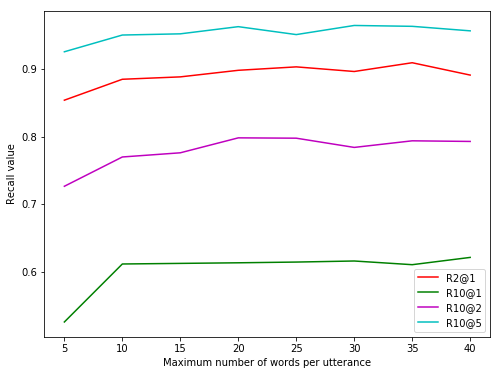

In [44]:
plt.figure(figsize=(8,6))

plt.plot(x, R2_1, label="R2@1", c="r")
plt.plot(x, R10_1, label="R10@1", c="g")
plt.plot(x, R10_2, label="R10@2", c="m")
plt.plot(x, R10_5, label="R10@5", c="c")

plt.xlabel("Maximum number of words per utterance")
plt.ylabel("Recall value")
plt.legend()
plt.show()

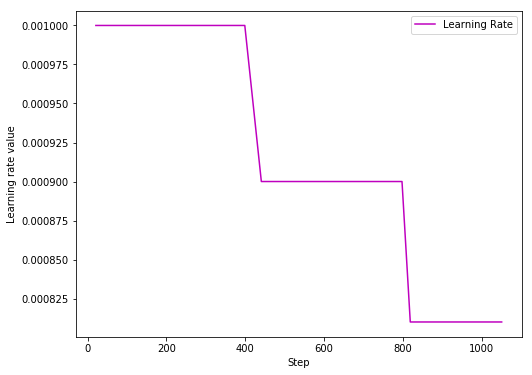

In [56]:
step = [21, 399, 441, 798, 819, 1051]
lr = [0.001, 0.001, 0.00090000004, 0.00090000004, 0.00081, 0.00081]

plt.figure(figsize=(8,6))

plt.plot(step, lr, label="Learning Rate", c="m")


plt.xlabel("Step")
plt.ylabel("Learning rate value")
plt.legend()
plt.show()

In [58]:
step =[21, 42, 63, 84, 105, 126, 147, 168, 189, 210, 231,252,273,294,315,336,357,378,399,420,441,462,483,504,525,546,567,588,609,630,651,672,693,714,735,756,777,798,819,840,861,882,903,924,945,966,987,1008,1029,1050]       

In [59]:
loss= [2.8770870027087985,2.667029448917934,2.347165419941857,2.3695212489082698,2.4799336819421676,2.220272257214501,2.182331096558344,2.1039409126554216,2.1204018536068143,2.089290675662813,1.9607815061296736,1.8823109921954928,1.9707018988473075,1.6940540614582242,1.6640597638629733,1.5242644945780437,1.6171314318974812,1.5577048290343511,1.6042509504726954,1.7586784987222581,1.5633538251831418,1.5504274879183089,1.714630229132516,1.4031765148753212,1.3981914548646837,0.8928183501675016,0.8235293186846233,0.9344999761808486,0.9463290728273845,0.9035560602233523,0.8927205204963684,0.9718258778254191,0.9321696914377666,0.8085945163454328,0.9904912610848745,0.8839144266787029,0.8517989416917165,0.8598621345701671,0.8031353212538219,1.1045230357419877,0.8631675669125148,0.7940478693871271,0.7573546426636832,0.7633672952651978,0.6982252271402449,0.7130223037231536,0.7032639547472909,0.5746024946371714,0.6957006248689833,0.70598817723138]

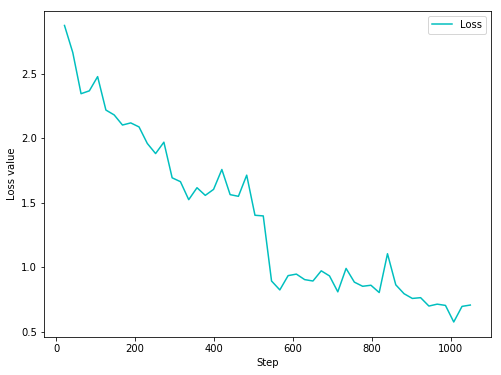

In [60]:
plt.figure(figsize=(8,6))

plt.plot(step, loss, label="Loss", c="c")


plt.xlabel("Step")
plt.ylabel("Loss value")
plt.legend()
plt.show()

## 5-folders Test

In [40]:
import pickle 

dataset = r"data_tn.test"
data_tn, word2vec_tn, max_len = pickle.load(open(dataset,"rb"))

In [166]:
test3 = {"y":data_tn['y'][7400:9459], "c":data_tn['c'][7400:9459],"r":data_tn['r'][7400:9459]}

In [167]:
test3_data_tn = build_prediction_set(test3)

In [168]:
valid3 = {"y":data_tn['y'][2800:4600], "c":data_tn['c'][2800:4600],"r":data_tn['r'][2800:4600]}

In [169]:
valid3_data_tn = build_prediction_set(valid3)

In [170]:
train1= {"y":data_tn['y'][3859:], "c":data_tn['c'][3859:],"r":data_tn['r'][3859:]}

In [171]:
train3= {"y":data_tn['y'][:2800]+data_tn['y'][4600:7400]+data_tn['y'][9459:], "c":data_tn['c'][:2800]+data_tn['c'][4600:7400]+data_tn['c'][9459:],"r":data_tn['r'][:2800]+data_tn['r'][4600:7400]+data_tn['r'][9459:]}


In [172]:
train3_data_tn = build_train_set(train3)

In [173]:
indexed_valid3_tn = make_indexed_data_tn(valid3_data_tn,word2vec_tn.word_idx_map)

Indexed data prepeared!


In [174]:
indexed_test3_tn = make_indexed_data_tn(test3_data_tn,word2vec_tn.word_idx_map)

Indexed data prepeared!


In [175]:
indexed_train3_tn = make_indexed_data_tn(train3_data_tn,word2vec_tn.word_idx_map)

Indexed data prepeared!


In [176]:
#pickle hole final data
pickle.dump([indexed_train3_tn, indexed_valid3_tn, indexed_test3_tn], open("data3_tn.pkl",'wb'))

In [177]:
#main.py for train

#import models.net as net
#import bin.train_and_evaluate as train
#import bin.test_and_evaluate as test

# configure

conf = {
    "data_path": "./data3_tn.pkl",
    "save_path": "./output_data3_tn_final/TunisianDailect/temp/",
#    "word_emb_init": None,
    "word_emb_init": "./embedding_tn.pkl",
    "init_model": None, #should be set for test

    "rand_seed": None, 

    "drop_dense": None,
    "drop_attention": None,

    "is_mask": True,
    "is_layer_norm": True,
    "is_positional": False,  

    "stack_num": 6,  
    "attention_type": "dot",

    "learning_rate": 1e-3,
    "vocab_size": 36506,
    "emb_size": 200,
    "batch_size": 32,     #200 for test

    "max_turn_num": 2,  
    "max_turn_len": 35, 

    "max_to_keep": 1,
    "num_scan_data": 2,
    "_EOS_": 1000000,      #1 for douban data
    "final_n_class": 1,
}


model_tn = Net(conf)
train(conf, model_tn)

loading word emb init
starting loading data
2019-06-04 10:50:13
finish loading data
2019-06-04 10:50:13
starting building validation batches
finish building validation batches
2019-06-04 10:50:13
configurations: {'stack_num': 6, 'attention_type': 'dot', 'print_step': 5.25, 'data_path': './data3_tn.pkl', 'drop_dense': None, 'drop_attention': None, 'save_step': 52.5, 'emb_size': 200, 'is_layer_norm': True, 'is_positional': False, 'word_emb_init': './embedding_tn.pkl', 'learning_rate': 0.001, 'max_turn_num': 2, 'num_scan_data': 2, '_EOS_': 1000000, 'train_steps': 1050, 'save_path': './output_data3_tn_final/TunisianDailect/temp/', 'max_to_keep': 1, 'max_turn_len': 35, 'batch_size': 32, 'vocab_size': 36506, 'final_n_class': 1, 'is_mask': True, 'rand_seed': None, 'init_model': None}
model sucess
2019-06-04 10:50:13
sim shape: (32, 2, 35, 35, 14)
conv_0 shape: (32, 2, 35, 35, 32)
pooling_0 shape: (32, 1, 12, 12, 32)
conv_1 shape: (32, 1, 12, 12, 16)
pooling_1 shape: (32, 1, 4, 4, 16)
build gr

In [178]:
#main.py for test

#import models.net as net
#import bin.train_and_evaluate as train
#import bin.test_and_evaluate as test

# configure

conf = {
    "data_path": "./data3_tn.pkl",
    "save_path": "./output_data3_tn_final/TunisianDailect/temp/",
#    "word_emb_init": None,
    "word_emb_init": "./embedding_tn.pkl",
    "init_model": "./output_data3_tn_final/TunisianDailect/temp/model.ckpt.18.0", 

    "rand_seed": None, 

    "drop_dense": None,
    "drop_attention": None,

    "is_mask": True,
    "is_layer_norm": True,
    "is_positional": False,  

    "stack_num": 6,  
    "attention_type": "dot",

    "learning_rate": 1e-3,
    "vocab_size": 36506,
    "emb_size": 200,
    "batch_size": 32, #200 for test

    "max_turn_num": 2,  
    "max_turn_len": 35, 

    "max_to_keep": 1,
    "num_scan_data": 2,
    "_EOS_": 1000000, #1 for douban data
    "final_n_class": 1,
}

model_tn = Net(conf)

#test and evaluation, init_model in conf should be set
test(conf, model_tn)

loading word emb init
starting loading data
2019-06-04 10:55:51
finish loading data
2019-06-04 10:55:51
starting building validation batches
finish building validation batches
2019-06-04 10:55:51
configurations: {'stack_num': 6, 'attention_type': 'dot', 'data_path': './data3_tn.pkl', 'drop_dense': None, 'drop_attention': None, 'emb_size': 200, 'is_layer_norm': True, 'is_positional': False, 'word_emb_init': './embedding_tn.pkl', 'learning_rate': 0.001, 'max_turn_num': 2, 'num_scan_data': 2, '_EOS_': 1000000, 'save_path': './output_data3_tn_final/TunisianDailect/temp/', 'max_to_keep': 1, 'max_turn_len': 35, 'batch_size': 32, 'vocab_size': 36506, 'final_n_class': 1, 'is_mask': True, 'rand_seed': None, 'init_model': './output_data3_tn_final/TunisianDailect/temp/model.ckpt.18.0'}
sim shape: (32, 2, 35, 35, 14)
conv_0 shape: (32, 2, 35, 35, 32)
pooling_0 shape: (32, 1, 12, 12, 32)
conv_1 shape: (32, 1, 12, 12, 16)
pooling_1 shape: (32, 1, 4, 4, 16)
build graph sucess
2019-06-04 10:56:17
INFO